In [1]:
import cv2
import os
import numpy as np

In [2]:
dirname = 'lfwcrop_color/faces/'
filenames = os.listdir(dirname)

In [ ]:
imgs = []
for fname in filenames:
    im = cv2.imread(dirname + fname)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = np.reshape(im, 64 * 64)
    
    imgs.append(im)

In [18]:
imgs = np.stack(imgs, axis=0)

In [22]:
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # 3D Plotting
from scipy import stats
import ipywidgets                         # interactions

%matplotlib inline

/Users/derek/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [23]:
faces = imgs

In [24]:
n_samples, n_features = faces.shape

# Center the faces
faces_centered = faces - faces.mean(axis=0)
faces_centered -= faces_centered.mean(axis=1) \
                                .reshape(n_samples, -1)

In [25]:
n_components = 6

In [27]:
from sklearn import decomposition

In [28]:
data = faces_centered
# We use a variant of PCA called Randomized PCA for efficiency. It uses stochastic SVD.
estimator = decomposition.RandomizedPCA(n_components=n_components, whiten=True)
estimator.fit(data)

RandomizedPCA(copy=True, iterated_power=3, n_components=6, random_state=None,
       whiten=True)

In [29]:

def plot_gallery(title, images, n_col=3, n_row=2):
    """
    Helper function to plot images.
    """
    image_shape = (64, 64)

    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks([])
        plt.yticks([])
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

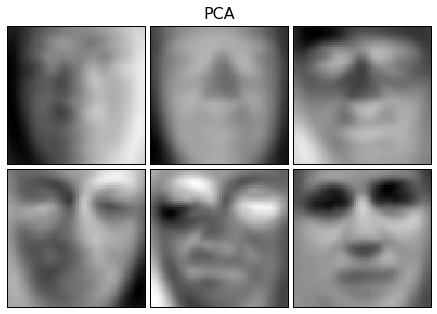

In [30]:
plot_gallery('PCA', estimator.components_[:n_components])